<a href="https://colab.research.google.com/github/Asadullah-Dogar/SpaceRaceAnalysis/blob/main/SpaceRaceAnalysis/Space_Missions_Analysis_(start).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [ ]:
%pip install iso3166

### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [ ]:
%pip install --upgrade plotly

### Import Statements

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [ ]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`?
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [ ]:
df_data.shape


(4324, 9)

In [ ]:
df_data.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data.

In [ ]:
df_data.isna().sum()

,0
Unnamed: 0.1,0
Unnamed: 0,0
Organisation,0
Location,0
Date,0
Detail,0
Rocket_Status,0
Price,3360
Mission_Status,0


In [ ]:
df_data.isnull().sum()

,0
Unnamed: 0.1,0
Unnamed: 0,0
Organisation,0
Location,0
Date,0
Detail,0
Rocket_Status,0
Price,3360
Mission_Status,0


In [ ]:
df_data.duplicated().sum()

0

In [ ]:
df_data = df_data.dropna(subset=['Price'])

In [ ]:
print(df_data['Price'].isnull().sum())  # Should return 0 if no missing values

0


In [ ]:
df_data.isna().sum()

,0
Unnamed: 0.1,0
Unnamed: 0,0
Organisation,0
Location,0
Date,0
Detail,0
Rocket_Status,0
Price,0
Mission_Status,0


## Descriptive Statistics

In [ ]:
df_data.describe()

,Unnamed: 0.1,Unnamed: 0
count,964.00,964.00
mean,858.49,858.49
std,784.21,784.21
min,0.00,0.00
25%,324.75,324.75
50%,660.50,660.50
75%,"1,112.00","1,112.00"
max,"4,020.00","4,020.00"


In [ ]:
df_data = df_data.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])

In [ ]:
df_data.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success


In [ ]:
df_data.describe()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
count,964,964,964,964,964,964,964
unique,25,56,963,962,2,56,4
top,CASC,"LC-39A, Kennedy Space Center, Florida, USA","Wed Nov 05, 2008 00:15 UTC",Long March 2D | Shiyan-3 & Chuangxin-1(02),StatusActive,450.0,Success
freq,158,120,2,2,586,136,910


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [ ]:
launches_per_org = df_data['Organisation'].value_counts()
print(launches_per_org)

Organisation
CASC               158
NASA               149
SpaceX              99
ULA                 98
Arianespace         96
Northrop            83
ISRO                67
MHI                 37
VKS RF              33
US Air Force        26
Roscosmos           23
Kosmotras           22
ILS                 13
Eurockot            13
Rocket Lab          13
Martin Marietta      9
Lockheed             8
Boeing               7
JAXA                 3
RVSN USSR            2
Sandia               1
Virgin Orbit         1
ESA                  1
ExPace               1
EER                  1
Name: count, dtype: int64


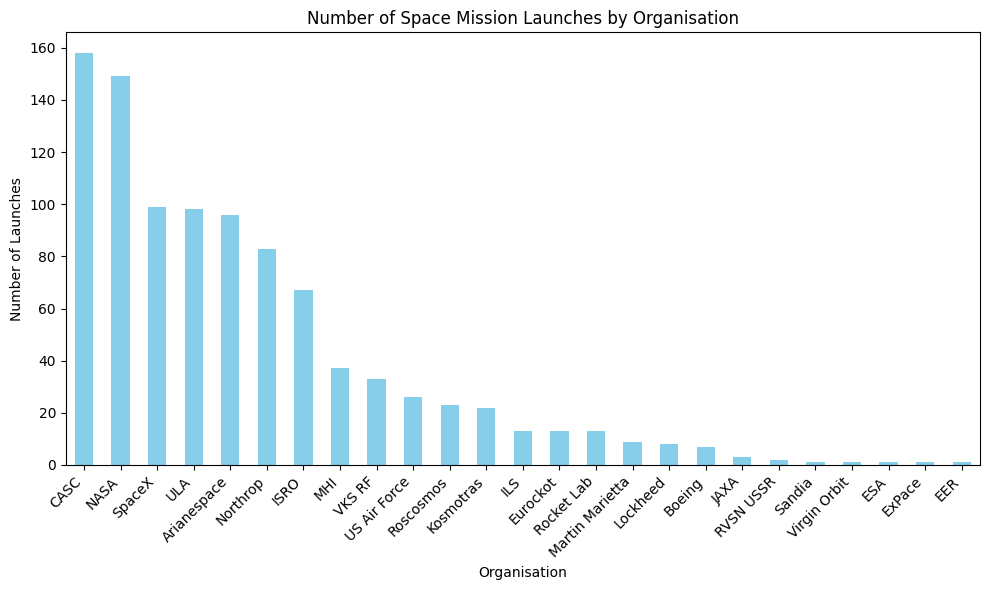

In [ ]:
plt.figure(figsize=(10, 6))
launches_per_org.plot(kind='bar', color='skyblue')

plt.title('Number of Space Mission Launches by Organisation')
plt.xlabel('Organisation')
plt.ylabel('Number of Launches')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned?

In [ ]:
rocket_status_counts = df_data['Rocket_Status'].value_counts()
print(rocket_status_counts)

Rocket_Status
StatusActive     586
StatusRetired    378
Name: count, dtype: int64


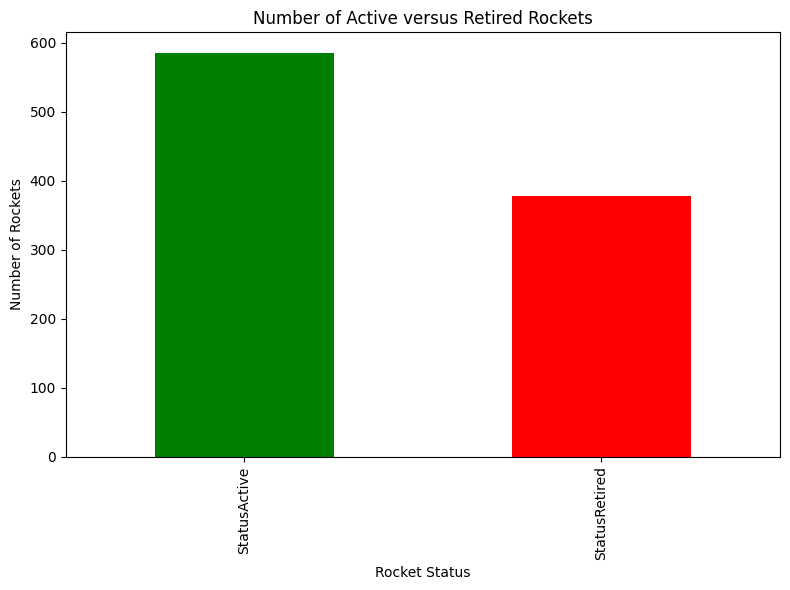

In [ ]:
plt.figure(figsize=(8, 6))
rocket_status_counts.plot(kind='bar', color=['green', 'red'])

plt.title('Number of Active versus Retired Rockets')
plt.xlabel('Rocket Status')
plt.ylabel('Number of Rockets')

plt.tight_layout()
plt.show()

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [ ]:
mission_status_counts = df_data['Mission_Status'].value_counts()
print(mission_status_counts)

Mission_Status
Success              910
Failure               36
Partial Failure       17
Prelaunch Failure      1
Name: count, dtype: int64


<ipython-input-60-13eb46196ceb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_data, x='Mission_Status', palette='coolwarm', order=['Success', 'Failure'])


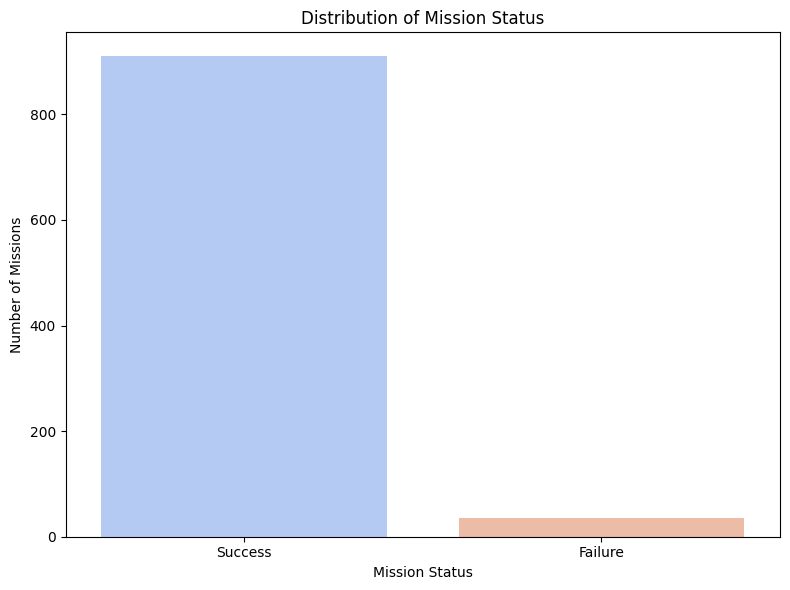

In [ ]:
plt.figure(figsize=(8, 6))

sns.countplot(data=df_data, x='Mission_Status', palette='coolwarm', order=['Success', 'Failure'])

plt.title('Distribution of Mission Status')
plt.xlabel('Mission Status')
plt.ylabel('Number of Missions')

plt.tight_layout()
plt.show()

# How Expensive are the Launches?

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values).

In [ ]:
df_data.isna().sum()

,0
Organisation,0
Location,0
Date,0
Detail,0
Rocket_Status,0
Price,0
Mission_Status,0


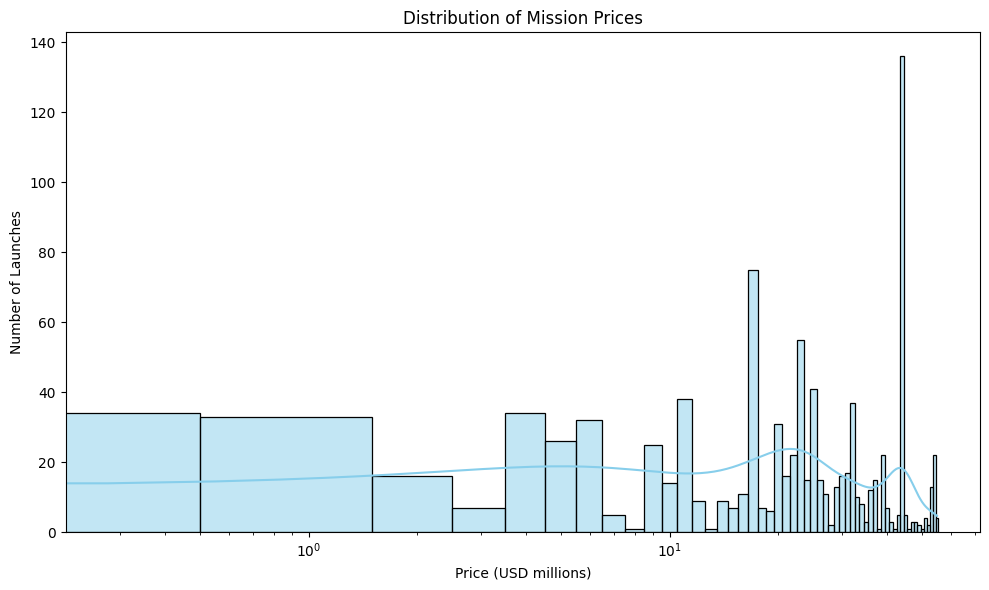

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_data, x='Price', bins=30, kde=True, color='skyblue')

plt.xscale('log')
plt.title('Distribution of Mission Prices')
plt.xlabel('Price (USD millions)')
plt.ylabel('Number of Launches')


plt.tight_layout()
plt.show()


# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map.
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [ ]:
def extract_country(location):
  country_name = location.split(',')[-1].strip()
  return country_name

def get_alpha3(location):
  try:
    country_name = extract_country(location)
    return countries.get(country_name).alpha3
  except KeyError:
    return None

df_data['Country Code'] = df_data['Location'].apply(get_alpha3)

launch_counts = df_data.groupby('Country Code').size().reset_index(name='Launch Count')
print(launch_counts)

  Country Code  Launch Count
0          CHN           158
1          FRA            95
2          IND            67
3          JPN            40
4          KAZ            46
5          NZL            13
6          USA           487


In [ ]:
fig = px.choropleth(
    launch_counts,
    locations='Country Code',
    color='Launch Count',
    hover_name='Country Code',
    color_continuous_scale='matter',
    title='Number of Space Launch by Country'
)

fig.show()

# Use a Choropleth Map to Show the Number of Failures by Country


In [ ]:
failure_data = df_data[df_data['Mission_Status'].isin(['Failure', 'Partial Failure'])]

# Count failures per country
failure_counts = failure_data.groupby('Country Code').size().reset_index(name='Failure_Count')

# Create the choropleth map
fig = px.choropleth(
    failure_counts,
    locations='Country Code',  # Alpha-3 country codes
    color='Failure_Count',     # Number of failures
    hover_name='Country Code', # Show country codes on hover
    color_continuous_scale='matter',  # Sequential color scale
    title='Number of Mission Failures by Country'
)

# Display the map
fig.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status.

In [ ]:
df_data['Country'] = df_data['Location'].apply(extract_country)

# Create the sunburst chart
fig = px.sunburst(
    df_data,
    path=['Country', 'Organisation', 'Mission_Status'],  # Hierarchical levels
    values=None,  # Counts automatically
    color='Mission_Status',  # Color based on Mission_Status
    title='Sunburst Chart of Countries, Organisations, and Mission Status',
    color_discrete_map={
        'Success': 'green',
        'Failure': 'red',
        'Partial Failure': 'orange'
    }
)

# Display the chart
fig.show()

In [ ]:
df_data["Price"] = pd.to_numeric(df_data["Price"], errors="coerce")

# Drop rows with missing Price values
df_data = df_data.dropna(subset=["Price"])

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [ ]:
total_spent = df_data.groupby("Organisation")["Price"].sum().sort_values(ascending=False)

# Display the results
print("Total Amount Spent by Each Organisation (in millions of USD):")
print(total_spent)


Total Amount Spent by Each Organisation (in millions of USD):
Organisation
NASA              61,200.00
Arianespace       16,345.00
ULA               14,798.00
CASC               6,340.26
SpaceX             5,444.00
Northrop           3,930.00
MHI                3,532.50
ISRO               2,177.00
US Air Force       1,550.92
VKS RF             1,548.90
ILS                1,320.00
Boeing             1,241.00
Roscosmos          1,187.50
Martin Marietta      721.40
Kosmotras            638.00
Eurockot             543.40
Lockheed             280.00
JAXA                 168.00
Rocket Lab            97.50
ESA                   37.00
ExPace                28.30
EER                   20.00
Sandia                15.00
Virgin Orbit          12.00
Name: Price, dtype: float64


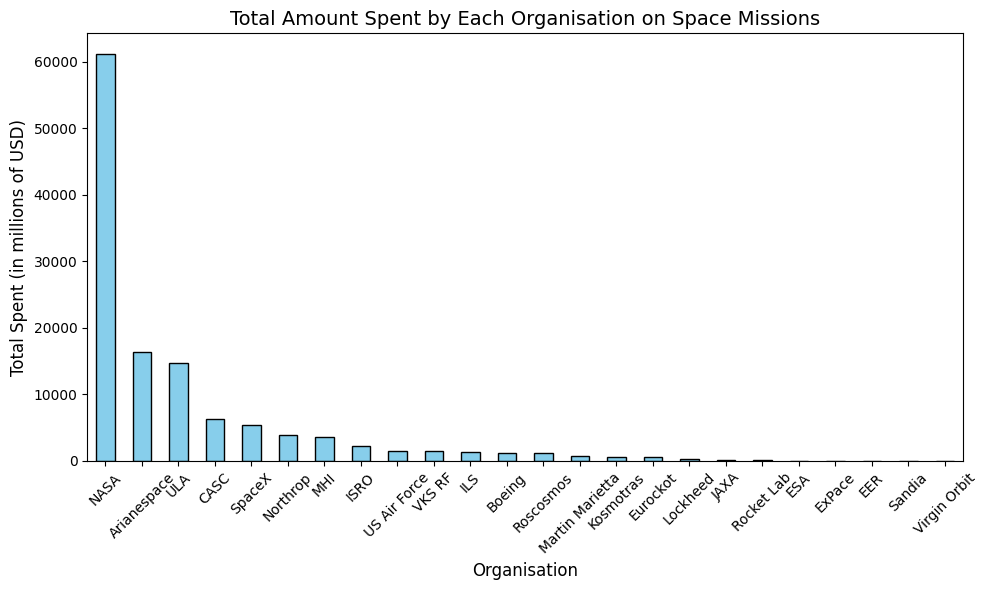

In [ ]:
# Visualize the data using a bar chart
plt.figure(figsize=(10, 6))
total_spent.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Total Amount Spent by Each Organisation on Space Missions", fontsize=14)
plt.xlabel("Organisation", fontsize=12)
plt.ylabel("Total Spent (in millions of USD)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Analyse the Amount of Money Spent by Organisation per Launch

In [ ]:
# Group by Organisation
grouped = df_data.groupby("Organisation").agg(
    total_cost=("Price", "sum"),
    launch_count=("Price", "count")
)

# Calculate average cost per launch
grouped["avg_cost_per_launch"] = grouped["total_cost"] / grouped["launch_count"]

# Display the results
print("Average Cost per Launch by Organisation (in millions of USD):")
print(grouped[["avg_cost_per_launch"]])

Average Cost per Launch by Organisation (in millions of USD):
                 avg_cost_per_launch
Organisation                        
Arianespace                   170.26
Boeing                        177.29
CASC                           40.13
EER                            20.00
ESA                            37.00
Eurockot                       41.80
ExPace                         28.30
ILS                           101.54
ISRO                           32.49
JAXA                           56.00
Kosmotras                      29.00
Lockheed                       35.00
MHI                            95.47
Martin Marietta                80.16
NASA                          450.00
Northrop                       47.35
Rocket Lab                      7.50
Roscosmos                      51.63
Sandia                         15.00
SpaceX                         54.99
ULA                           151.00
US Air Force                   59.65
VKS RF                         46.94
Virgin Orbit 

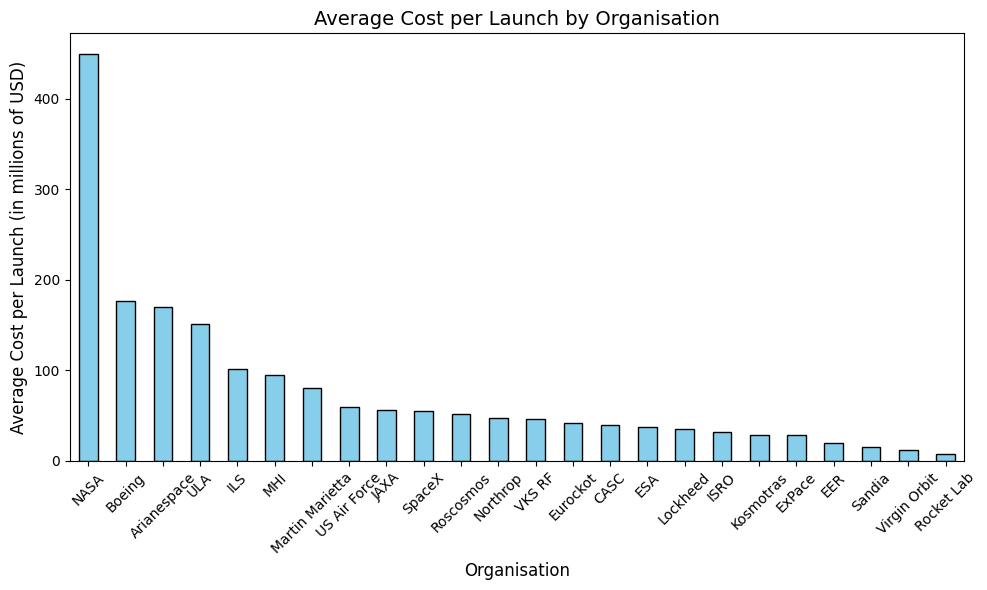

In [ ]:
plt.figure(figsize=(10, 6))
grouped["avg_cost_per_launch"].sort_values(ascending=False).plot(
    kind="bar", color="skyblue", edgecolor="black"
)
plt.title("Average Cost per Launch by Organisation", fontsize=14)
plt.xlabel("Organisation", fontsize=12)
plt.ylabel("Average Cost per Launch (in millions of USD)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Chart the Number of Launches per Year

In [ ]:
# Convert Date to datetime, infer format, and extract the year
df_data["Year"] = pd.to_datetime(df_data["Date"], errors="coerce").dt.year

# Clean the Year column (round to nearest integer if necessary)
df_data["Year"] = df_data["Year"].apply(lambda x: round(x) if pd.notnull(x) else x)

# Drop rows where Year is NaN (invalid dates)
df_data = df_data.dropna(subset=["Year"])

# Count the number of launches per year
launches_per_year = df_data["Year"].value_counts().sort_index()

# Display the results
print(launches_per_year)

Year
1964     2
1965     2
1966     3
1967     6
1968     8
1969     4
1981     2
1982     4
1983     5
1984     6
1985    10
1986     3
1987     2
1988     4
1989     6
1990    11
1991     7
1992    12
1993    12
1994    16
1995    10
1996    14
1997    18
1998    18
1999    13
2000    16
2001    10
2002    16
2003    20
2004    17
2005    15
2006    27
2007    29
2008    28
2009    31
2010    29
2011    29
2012    24
2013    33
2014    41
2015    37
2016    64
2017    66
2018    88
2019    73
2020    52
Name: count, dtype: int64


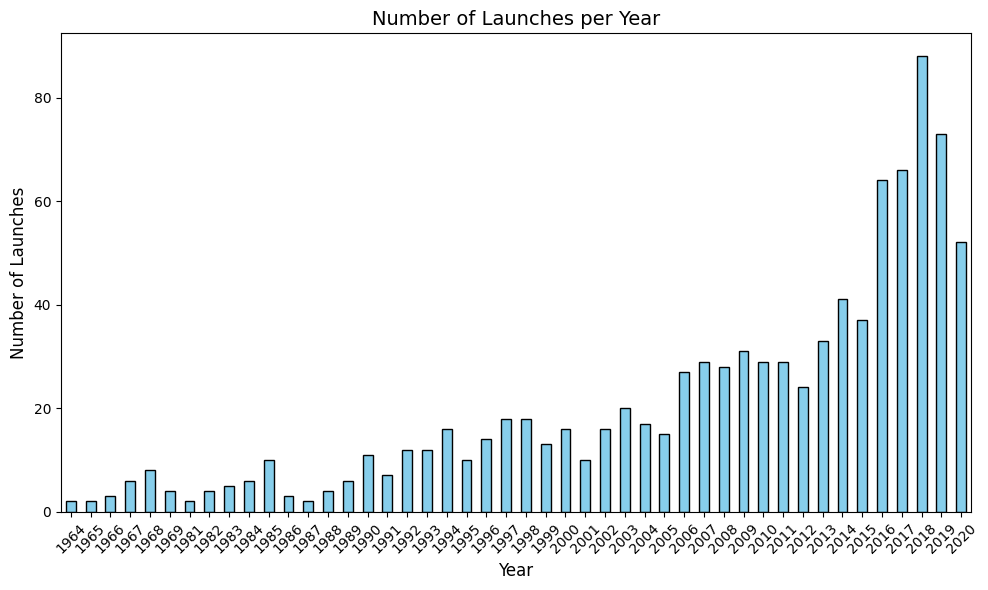

In [ ]:
plt.figure(figsize=(10, 6))
launches_per_year.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Number of Launches per Year", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Launches", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart.

In [ ]:
# Convert Date to datetime
df_data["Date"] = pd.to_datetime(df_data["Date"], errors="coerce")

# Extract Year and Month from the Date column
df_data["Year_Month"] = df_data["Date"].dt.to_period("M")

# Count the number of launches per month
launches_per_month = df_data["Year_Month"].value_counts().sort_index()

# Calculate the rolling average (e.g., 3 months)
rolling_avg = launches_per_month.rolling(window=3).mean()


<ipython-input-92-cbdb85ab08eb>:5: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.



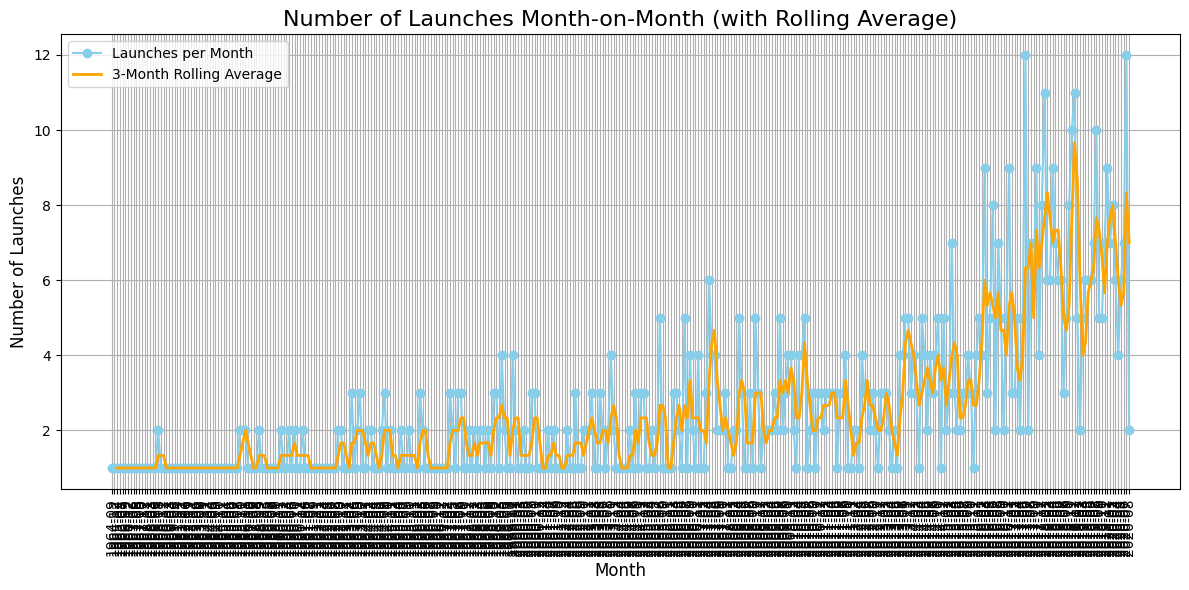

The month with the highest number of launches is 2017-06, with 12 launches.


In [ ]:
# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(launches_per_month.index.astype(str), launches_per_month, label="Launches per Month", color="skyblue", marker="o")
plt.plot(launches_per_month.index.astype(str), rolling_avg, label="3-Month Rolling Average", color="orange", linewidth=2)

# Labeling
plt.title("Number of Launches Month-on-Month (with Rolling Average)", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Launches", fontsize=12)
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()

# Identify the month with the highest number of launches
max_launches_month = launches_per_month.idxmax()
max_launches_count = launches_per_month.max()

print(f"The month with the highest number of launches is {max_launches_month}, with {max_launches_count} launches.")

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [ ]:
# Extract Month from the Date column
df_data["Month"] = df_data["Date"].dt.month

# Count the number of launches per month
launches_per_month = df_data["Month"].value_counts().sort_index()

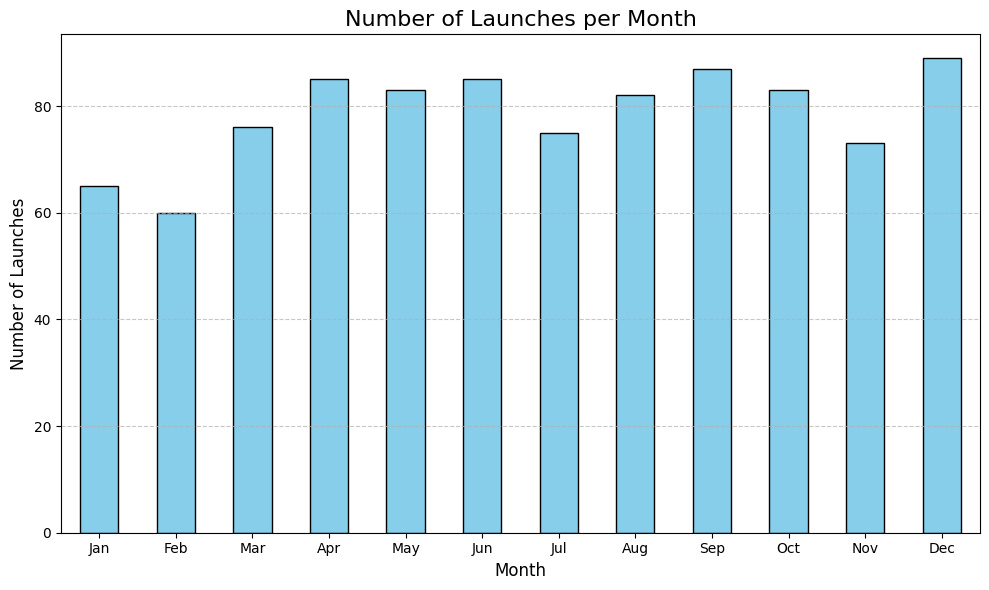

In [ ]:
# Create a bar plot of the number of launches per month
plt.figure(figsize=(10, 6))
launches_per_month.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Number of Launches per Month", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Launches", fontsize=12)
plt.xticks(ticks=range(12), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

# Display the plot
plt.show()

# How has the Launch Price varied Over Time?

Create a line chart that shows the average price of rocket launches over time.

In [ ]:
# Extract the year from the Date column
df_data["Year"] = df_data["Date"].dt.year

# Group by Year and calculate the average price
average_price_per_year = df_data.groupby("Year")["Price"].mean()

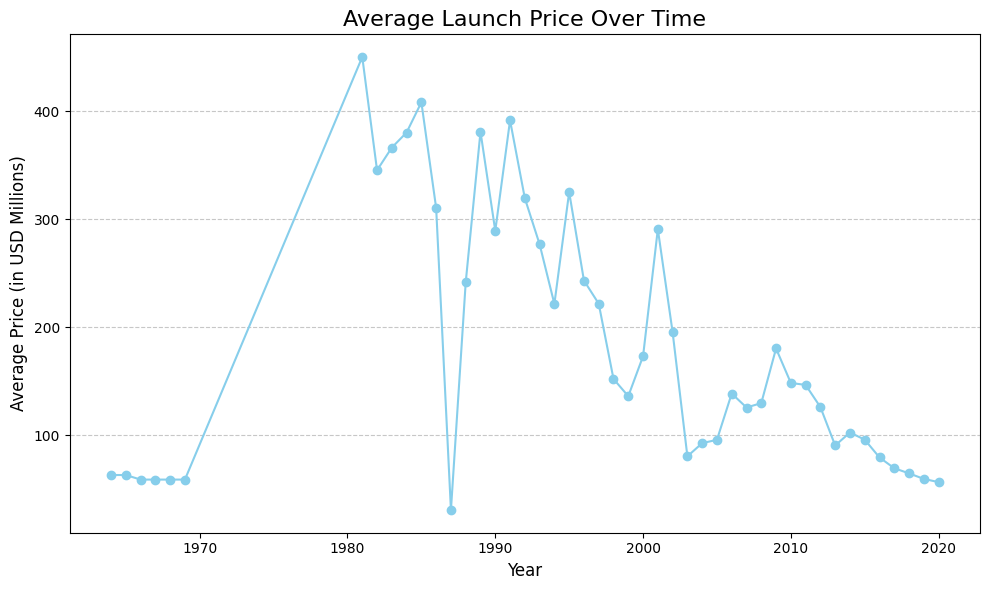

In [ ]:
# Create a line plot of the average price per year
plt.figure(figsize=(10, 6))
average_price_per_year.plot(kind="line", color="skyblue", marker="o", linestyle="-")
plt.title("Average Launch Price Over Time", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Price (in USD Millions)", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

# Display the plot
plt.show()

# Chart the Number of Launches over Time by the Top 10 Organisations.

How has the dominance of launches changed over time between the different players?

In [ ]:
# Get the top 10 organizations with the most launches
top_10_organizations = df_data["Organisation"].value_counts().head(10).index

# Filter the dataset to include only the top 10 organizations
df_top_10 = df_data[df_data["Organisation"].isin(top_10_organizations)]

# Extract the year from the Date column
df_top_10["Year"] = df_top_10["Date"].dt.year

# Group by Year and Organisation, then count the launches
launches_by_org_year = df_top_10.groupby(["Year", "Organisation"]).size().unstack(fill_value=0)


<ipython-input-98-20004a91a33b>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Figure size 1200x800 with 0 Axes>

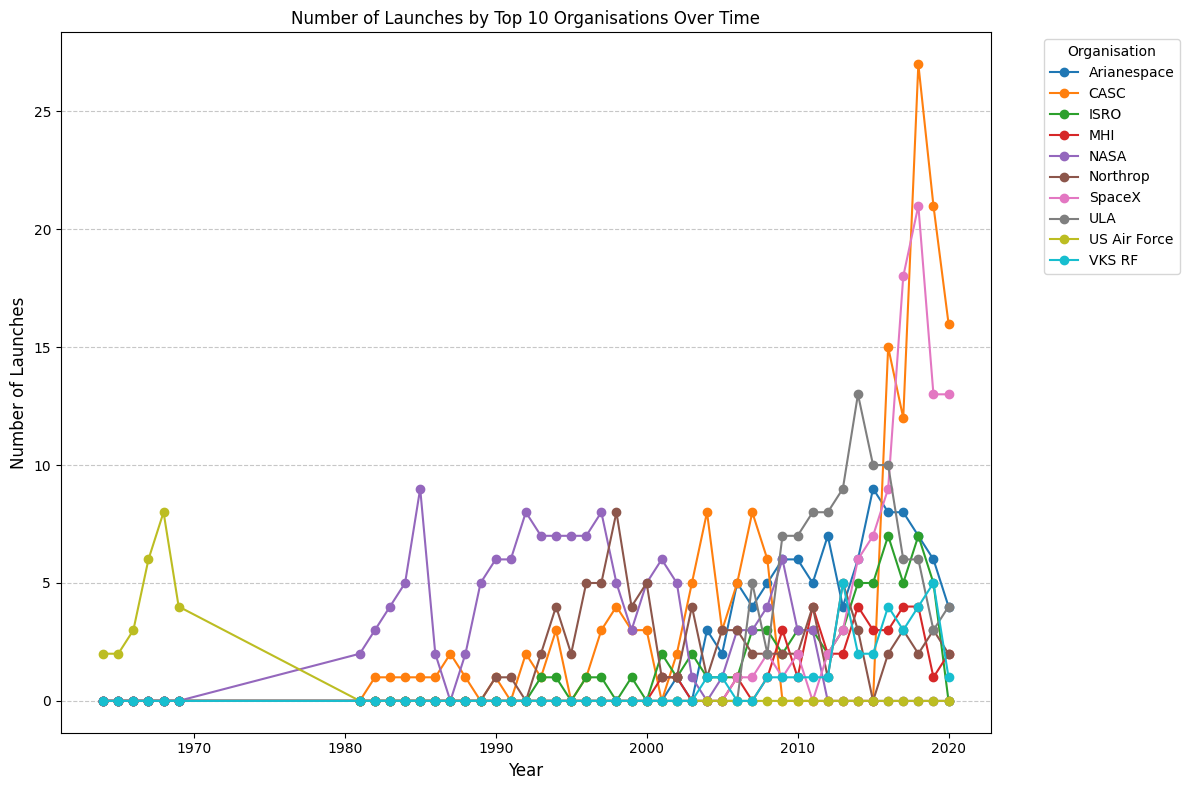

In [ ]:
# Plot the results
plt.figure(figsize=(12, 8))
launches_by_org_year.plot(kind="line", marker="o", figsize=(12, 8), title="Number of Launches by Top 10 Organisations Over Time")
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Launches", fontsize=12)
plt.legend(title="Organisation", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

# Display the plot
plt.show()

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991.

In [ ]:
# Filter the dataset for launches before 1991
df_cold_war = df_data[df_data["Year"] <= 1991]

# Map organisations to countries (USA vs USSR/Russia)
usa_organizations = ["SpaceX", "NASA", "ULA", "Northrop Grumman", "Boeing"]
ussr_organizations = ["Roscosmos", "Soviet Union", "Energia", "Gonets Satcom"]  # Adjust this list based on dataset

# Add a column to indicate the country based on the organization
df_cold_war["Country"] = df_cold_war["Organisation"].apply(
    lambda x: "USA" if x in usa_organizations else ("USSR" if x in ussr_organizations else "Other")
)

# Filter out "Other" organizations
df_cold_war = df_cold_war[df_cold_war["Country"].isin(["USA", "USSR"])]

# Group by year and country to count the number of launches
launches_by_country = df_cold_war.groupby(["Year", "Country"]).size().unstack(fill_value=0)


<ipython-input-100-1155d65af0ad>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Figure size 1200x800 with 0 Axes>

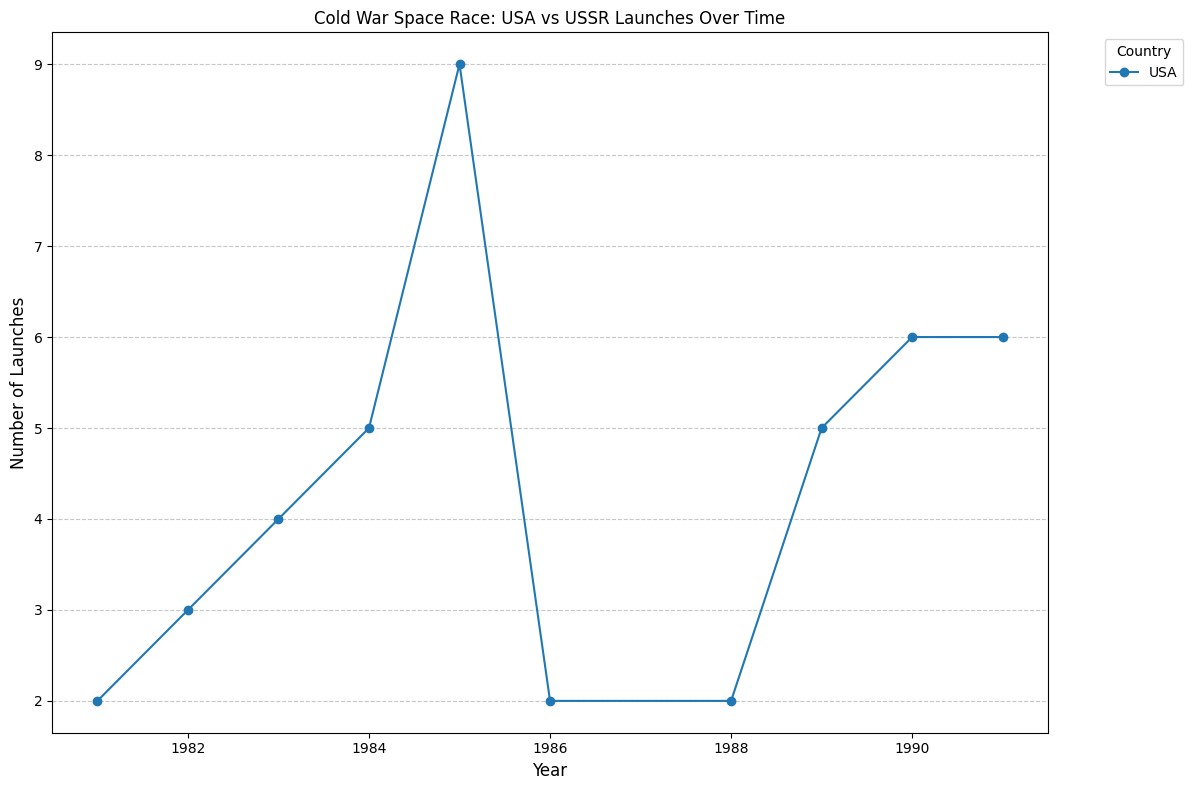

In [ ]:
# Plot the results
plt.figure(figsize=(12, 8))
launches_by_country.plot(kind="line", marker="o", figsize=(12, 8), title="Cold War Space Race: USA vs USSR Launches Over Time")
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Launches", fontsize=12)
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

# Display the plot
plt.show()

## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches.

In [ ]:
# Map organisations to countries (USA, USSR, and Kazakhstan)
usa_organizations = ["SpaceX", "NASA", "ULA", "Northrop Grumman", "Boeing"]
ussr_organizations = ["Roscosmos", "Soviet Union", "Energia", "Gonets Satcom", "Kazakhstan"]

# Add a column to indicate the country based on the organization
df_data["Country"] = df_data["Organisation"].apply(
    lambda x: "USA" if x in usa_organizations else ("USSR" if x in ussr_organizations else "Other")
)

# Filter out "Other" organizations
df_data = df_data[df_data["Country"].isin(["USA", "USSR"])]

# Count the number of launches by country
launches_by_country = df_data["Country"].value_counts()

In [ ]:
fig = px.pie(
    names=launches_by_country.index,
    values=launches_by_country.values,
    title="Total Number of Launches: USA vs USSR (including Kazakhstan)",
    labels={"values": "Number of Launches", "names": "Country"},
    color=launches_by_country.index,
    color_discrete_map={"USA": "blue", "USSR": "red"}
)

# Show the pie chart
fig.show()

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [ ]:
# Map organisations to countries (USA, USSR, and Kazakhstan)
usa_organizations = ["SpaceX", "NASA", "ULA", "Northrop Grumman", "Boeing"]
ussr_organizations = ["Roscosmos", "Soviet Union", "Energia", "Gonets Satcom", "Kazakhstan"]

# Add a column to indicate the country based on the organization
df_data["Country"] = df_data["Organisation"].apply(
    lambda x: "USA" if x in usa_organizations else ("USSR" if x in ussr_organizations else "Other")
)

# Filter out "Other" organizations
df_data = df_data[df_data["Country"].isin(["USA", "USSR"])]

# Extract Year from Date
df_data["Year"] = pd.to_datetime(df_data["Date"], errors="coerce").dt.year

# Drop rows where Year is NaN (invalid dates)
df_data = df_data.dropna(subset=["Year"])

# Group by Year and Country, count the number of launches
launches_by_year_country = df_data.groupby(["Year", "Country"]).size().reset_index(name="Launches")


In [ ]:
 #Plot a line chart
fig = px.line(
    launches_by_year_country,
    x="Year",
    y="Launches",
    color="Country",
    title="Year-on-Year Launches by USA and USSR",
    labels={"Year": "Year", "Launches": "Number of Launches"},
    markers=True
)

# Show the chart
fig.show()

## Chart the Total Number of Mission Failures Year on Year.

In [ ]:
# Filter for failed missions
failed_missions = df_data[df_data["Mission_Status"] == "Failure"]

# Extract Year from Date
failed_missions["Year"] = pd.to_datetime(failed_missions["Date"], errors="coerce").dt.year

# Drop rows where Year is NaN (invalid dates)
failed_missions = failed_missions.dropna(subset=["Year"])

# Group by Year, count the number of failures
failures_by_year = failed_missions.groupby("Year").size().reset_index(name="Failures")


<ipython-input-106-4e5999b0ac45>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Plot a line chart
fig = px.line(
    failures_by_year,
    x="Year",
    y="Failures",
    title="Total Number of Mission Failures Year-on-Year",
    labels={"Year": "Year", "Failures": "Number of Failures"},
    markers=True
)

# Show the chart
fig.show()

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time?

In [ ]:

# Filter for both successful and failed missions
missions = df_data[df_data["Mission_Status"].isin(["Failure", "Success"])]

# Extract Year from Date
missions["Year"] = pd.to_datetime(missions["Date"], errors="coerce").dt.year

# Drop rows where Year is NaN (invalid dates)
missions = missions.dropna(subset=["Year"])

# Group by Year, count total missions and failed missions
missions_by_year = missions.groupby("Year")["Mission_Status"].value_counts().unstack().fillna(0)

# Calculate the percentage of failures
missions_by_year["Failure_Percentage"] = (missions_by_year["Failure"] / (missions_by_year["Failure"] + missions_by_year["Success"])) * 100

# Reset index for plotting
missions_by_year = missions_by_year.reset_index()


<ipython-input-108-d69d541007a6>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Plot a line chart showing failure percentage over time
fig = px.line(
    missions_by_year,
    x="Year",
    y="Failure_Percentage",
    title="Percentage of Failures Over Time",
    labels={"Year": "Year", "Failure_Percentage": "Failure Percentage"},
    markers=True
)

# Show the chart
fig.show()

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches?

In [ ]:

# Filter the dataset for missions up to and including 2020
df_data["Year"] = pd.to_datetime(df_data["Date"], errors="coerce").dt.year
df_data = df_data[df_data["Year"] <= 2020]

# Group by Year and Country to count launches per country each year
launches_by_country_year = df_data.groupby(["Year", "Country"])["Mission_Status"].count().unstack().fillna(0)

# Find the country with the maximum number of launches each year
leading_countries = launches_by_country_year.idxmax(axis=1)

# Display the leading country for each year
leading_countries_df = pd.DataFrame(leading_countries, columns=["Leading Country"])
leading_countries_df.reset_index(inplace=True)

# Display the results
leading_countries_df

,Year,Leading Country
0,1981,USA
1,1982,USA
2,1983,USA
3,1984,USA
4,1985,USA
5,1986,USA
6,1988,USA
7,1989,USA
8,1990,USA
9,1991,USA


# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020?

In [ ]:
# Extract year from the Date column
df_data["Year"] = pd.to_datetime(df_data["Date"], errors="coerce").dt.year

# Group by Year and Organisation to count the number of launches
launches_by_organisation_year = df_data.groupby(["Year", "Organisation"]).size().unstack().fillna(0)

# Find the organization with the maximum number of launches each year
dominant_organisations = launches_by_organisation_year.idxmax(axis=1)



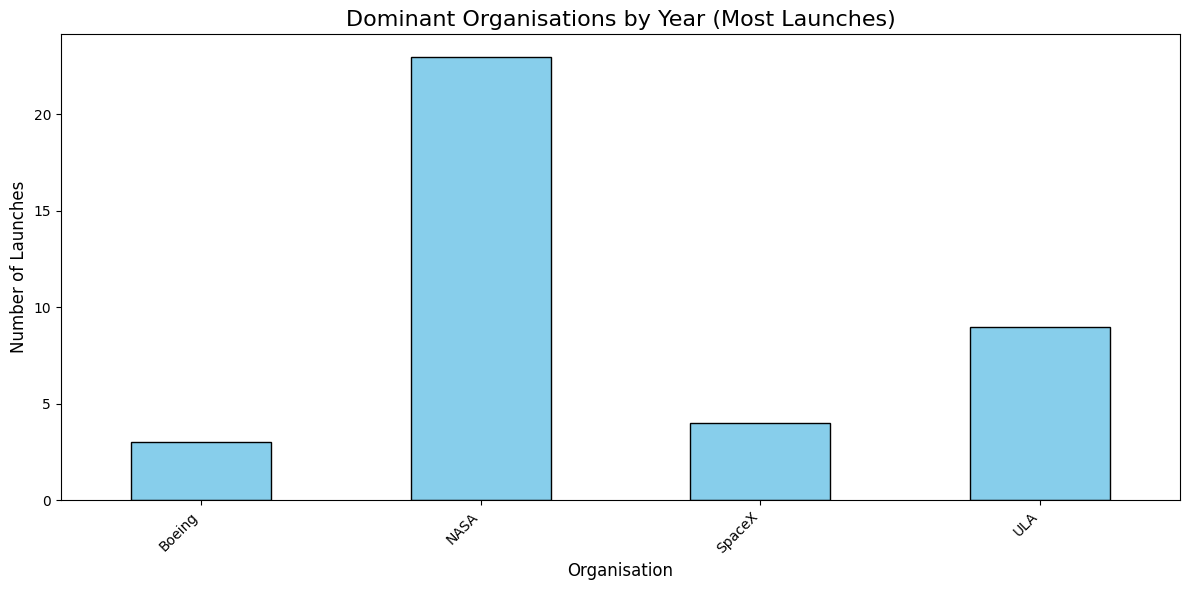

In [ ]:

# Create a chart showing the most dominant organisation each year
plt.figure(figsize=(12, 6))
dominant_organisations.value_counts().sort_index().plot(kind="bar", color='skyblue', edgecolor='black')

# Add titles and labels
plt.title("Dominant Organisations by Year (Most Launches)", fontsize=16)
plt.xlabel("Organisation", fontsize=12)
plt.ylabel("Number of Launches", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Display the chart
plt.show()


In [ ]:
# Display the dominant organisation in the 1970s, 1980s, and for 2018-2020
dominant_organisations_1970s = dominant_organisations[(dominant_organisations.index >= 1970) & (dominant_organisations.index < 1980)]
dominant_organisations_1980s = dominant_organisations[(dominant_organisations.index >= 1980) & (dominant_organisations.index < 1990)]
dominant_organisations_recent = dominant_organisations[(dominant_organisations.index >= 2018)]

dominant_organisations_1970s, dominant_organisations_1980s, dominant_organisations_recent

(Series([], dtype: object),
 Year
 1981    NASA
 1982    NASA
 1983    NASA
 1984    NASA
 1985    NASA
 1986    NASA
 1988    NASA
 1989    NASA
 dtype: object,
 Year
 2018    SpaceX
 2019    SpaceX
 2020    SpaceX
 dtype: object)